# Sentiment Analysis on Tweets for Stocks

In [161]:
# Libraries
import twint
import nest_asyncio
nest_asyncio.apply()
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import datetime, timedelta
import plotly.express as px
import yfinance as yf
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Gathering Tweets

## Function for Twint

In [62]:
def getTweets(search_term, until, limit=20):
    """
    Configures Twint and returns a dataframe of tweets for a specific day.
    """
    # Configuring Twint for search
    c = twint.Config()

    # The limit of tweets to retrieve
    c.Limit = limit

    # Search term
    c.Search = search_term

    # Removing retweets
    c.Filter_retweets = True
    
    # Popular tweets
    c.Popular_tweets = False

    # Lowercasing tweets
    c.Lowercase = True

    # English only
    c.Lang = 'en'

    # Tweets until a specified date
    c.Until = until + " 00:00:00"
    
    # Making the results pandas friendly
    c.Pandas = True
    
    # Stopping print in terminal
    c.Hide_output = True

    # Searching
    twint.run.Search(c)
    
    # Assigning the DF
    df = twint.storage.panda.Tweets_df
    
    # Returning an empty DF if no tweets were found
    if len(df)<=0:
        return pd.DataFrame()
    
    # Formatting the date
    df['date'] = df['date'].apply(lambda x: x.split(" ")[0])
    
    return df

In [51]:
df = getTweets("$GME", "2021-08-07", 20)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [52]:
df

""


## Using Twint
Tweet retrieval over a period of time.

In [68]:
def tweetByDay(start, end, df, search, limit=20):
    """
    Runs the twint query everyday between the given dates and returns
    a dataframe.
    """
    # Finishing the recursive loop
    if start==end:
        # Removing any potential duplicates
        df = df.drop_duplicates(subset="id")
        print(len(df))
        return df
    
    # Appending the new set of tweets for the day
    tweet_df = getTweets(search, end, limit)
    
    # Running the query a few more times in case twint missed some tweets
    run = 0 
    
    while len(tweet_df)==0 or run<=2:
        # Running query again
        tweet_df = getTweets(search, end, limit)
        
        # Counting how many times it ran
        run += 1
    
    # Adding the new tweets
    df = df.append(tweet_df, ignore_index=True)
    
    # Updating the new end date
    new_end = (datetime.strptime(end, "%Y-%m-%d") + timedelta(days=1)).strftime("%Y-%m-%d")
    
    # Printing scraping status
    print(f"\t{len(df)} Total Tweets collected as of {new_end}\t")
    
    # Running the function again
    return tweetByDay(start, new_end, df, search)

In [69]:
# Getting tweets daily
df = tweetByDay("2021-09-01", "2021-08-21", pd.DataFrame(), search="$GME", limit=20)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
	19 Total Tweets collected as of 2021-08-22	
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
	39 Total Tweets collected as of 2021-08-23	
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! S

In [70]:
df

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1428869262739976195,1428869262739976195,1.629504e+12,2021-08-20,-0400,,When $GME went back to almost 350 and I can't ...,en,[],[gme],...,,,,,,[],,,,
1,1428868836749611011,1428868836749611011,1.629504e+12,2021-08-20,-0400,,Fidelity Customer Orders 8/20/2021 Rank &amp; ...,en,"[amc, gme]","[amc, gme]",...,,,,,,[],,,,
2,1428867468034981888,1428867468034981888,1.629504e+12,2021-08-20,-0400,,Happy Weekend my beautiful apes… 🦍enjoy the li...,en,"[moass, amcfamily]","[amc, gme]",...,,,,,,[],,,,
3,1428867069081268226,1428867069081268226,1.629503e+12,2021-08-20,-0400,,https://t.co/m9NQXrJo0b $GME,und,[],[gme],...,,,,,,[],,,,
4,1428866404955140097,1418751218566918146,1.629503e+12,2021-08-20,-0400,,@ryancohen Simmer down tits… simmer down $GME ...,en,[],[gme],...,,,,,,"[{'screen_name': 'ryancohen', 'name': 'Ryan Co...",,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1432490508090228739,1432490508090228739,1.630367e+12,2021-08-30,-0400,,LFG $BBIG $AMC $GME LFG🚀🚀🚀,en,[],"[bbig, amc, gme]",...,,,,,,[],,,,
236,1432490350162100229,1432490350162100229,1.630367e+12,2021-08-30,-0400,,a Cabal is running our government? Oh right- ...,en,"[gme, amc]","[gme, amc]",...,,,,,,[],,,,
237,1432490108243038211,1432490108243038211,1.630367e+12,2021-08-30,-0400,,WATCHING $GME OVER 218 https://t.co/psI9W5LKvj,en,[],[gme],...,,,,,,[],,,,
238,1432490025338376195,1432490025338376195,1.630367e+12,2021-08-30,-0400,,👀 Ichimoku Setups on watch for Tues 8/31: $GM...,en,"[optionstrading, optionsflow]","[gme, dkng, ddd, meli, dis]",...,,,,,,[],,,,


# Sentiment Analysis

## Sentiment Function

In [71]:
def getSentiment(df, measurement="compound"):
    """
    Given a DF of tweets, analyzes the tweets and returns a new DF
    of sentiment scores based on the given measurement.
    Accepted sentiment measurements: ["pos", "neg", "neu", "compound"]
    """

    # Sentiment Analyzer
    sia = SentimentIntensityAnalyzer()

    # Getting the sentiment score
    df['sentiment'] = df['tweet'].apply(lambda x: sia.polarity_scores(x)[measurement])

    # Creating a DF with the average sentiment score each day
    sent_df = df.groupby('date')['sentiment'].mean().reset_index()
    
    # Converting the dates to datetime
    sent_df['date'] = sent_df['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
    
    return sent_df

In [72]:
sent_df = getSentiment(df)

sent_df

,date,sentiment
0,2021-08-20,0.091258
1,2021-08-21,0.178620
2,2021-08-22,0.152940
3,2021-08-23,0.237620
4,2021-08-24,0.211463
5,2021-08-25,0.194975
6,2021-08-26,0.038705
7,2021-08-27,0.217585
8,2021-08-28,0.122213
9,2021-08-29,0.208930


## Visualization

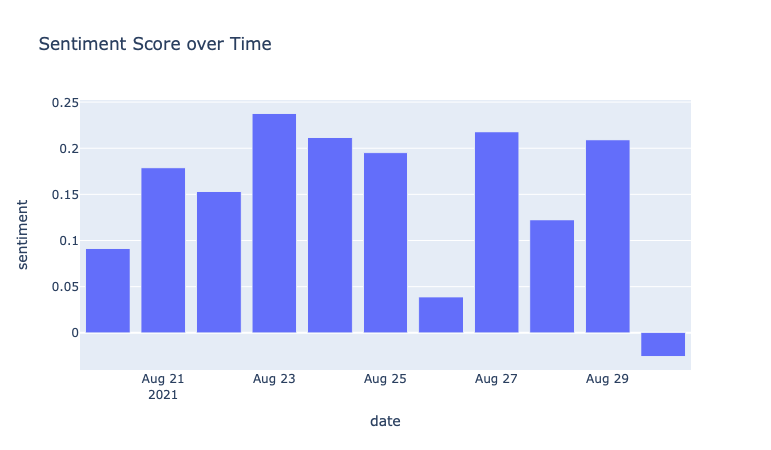

In [73]:
fig = px.bar(sent_df,
             x=sent_df['date'],
             y=sent_df['sentiment'],
             title="Sentiment Score over Time")

fig.show()

# Price Data

In [74]:
def getStockPrices(ticker, start, end):
    """
    Gets the historical daily prices between two dates. Scaling the prices based on a
    given sentiment dataframe.
    """
    # Setting the stock
    stock = yf.Ticker(ticker)

    # Getting historical prices
    stock_df = stock.history(start=end, end=start, interval="1d")[['Close']]
        
    # Getting the daily percent changes
    stock_df = stock_df.pct_change(1).dropna()
    
    # Some reformatting
    stock_df = stock_df.reset_index().rename(
        columns={
            "Date": "date",
            "Close": "returns"
        }
    )
    
    return stock_df

In [75]:
stock_df = getStockPrices(
    "GME", 
    "2021-09-01", 
    "2021-08-21"
)

stock_df

,date,returns
0,2021-08-24,0.275335
1,2021-08-25,-0.050597
2,2021-08-26,0.027899
3,2021-08-27,-0.001316
4,2021-08-30,0.020737
5,2021-08-31,0.043212


## % Return Visualization

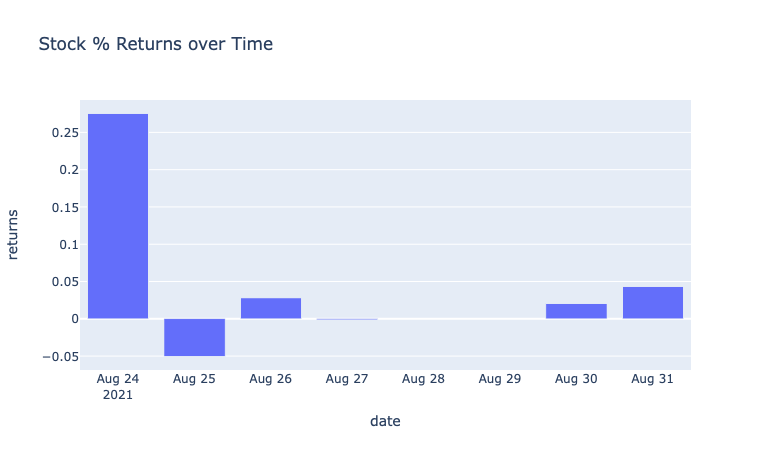

In [76]:
fig = px.bar(stock_df,
             x=stock_df['date'],
             y=stock_df['returns'],
             title="Stock % Returns over Time")

fig.show()

# Price and Sentiment

In [191]:
# Merging the two DF
comb_df = sent_df.merge(stock_df, how='outer', sort=True)

# Shifting the sentiment scores 1 day to compensate for lookahead bias
comb_df['sentiment'] = comb_df['sentiment'].shift(1)

# Scaling the data
scaler = MinMaxScaler(
    feature_range=(
        comb_df['sentiment'].min(),
        comb_df['sentiment'].max()
    )
)

# comb_df[['sentiment', 'returns']] = scaler.fit_transform(
#     comb_df[['sentiment', 'returns']]
# )
comb_df[['returns']] = scaler.fit_transform(comb_df[['returns']])

# How often sentiment matched return

# Dropping NAs so they are not compared
drop_df = comb_df.dropna()

# Comparing matches
match = (drop_df['sentiment'].apply(lambda x: x>0)==drop_df['returns'].apply(lambda x: x>0))

# Counting instances where they match
match = match.value_counts().rename({False: "Didn't predict return",
                                     True: "Successfully predicted return"}).to_frame()
match

,0
Successfully predicted return,4
Didn't predict return,2


In [192]:
comb_df

,date,sentiment,returns
0,2021-08-20,NaN,NaN
1,2021-08-21,0.091258,NaN
2,2021-08-22,0.178620,NaN
3,2021-08-23,0.152940,NaN
4,2021-08-24,0.237620,0.237620
5,2021-08-25,0.211463,-0.025710
6,2021-08-26,0.194975,0.037709
7,2021-08-27,0.038705,0.014106
8,2021-08-28,0.217585,NaN
9,2021-08-29,0.122213,NaN


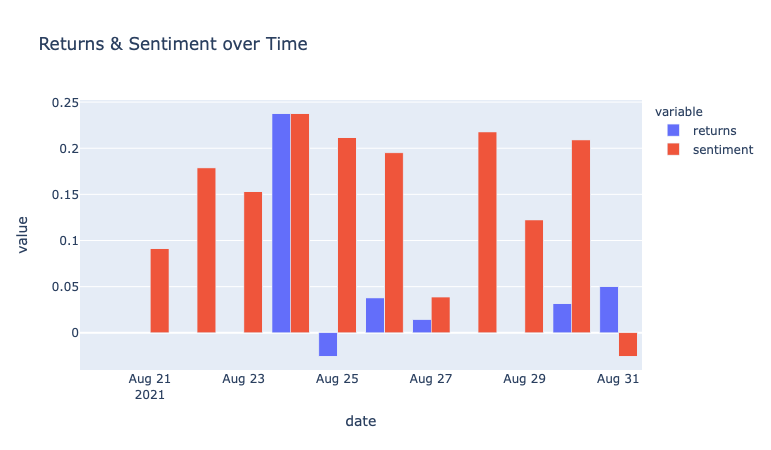

In [193]:
fig = px.bar(
    comb_df,
    x='date',
    y=['returns', 'sentiment'],
    barmode='group',
    title="Returns & Sentiment over Time",
    labels={"value": "Return & Sentiment Values"}
)

fig.show()

## Sentiment and Returns matching?

In [194]:
match

,0
Successfully predicted return,4
Didn't predict return,2


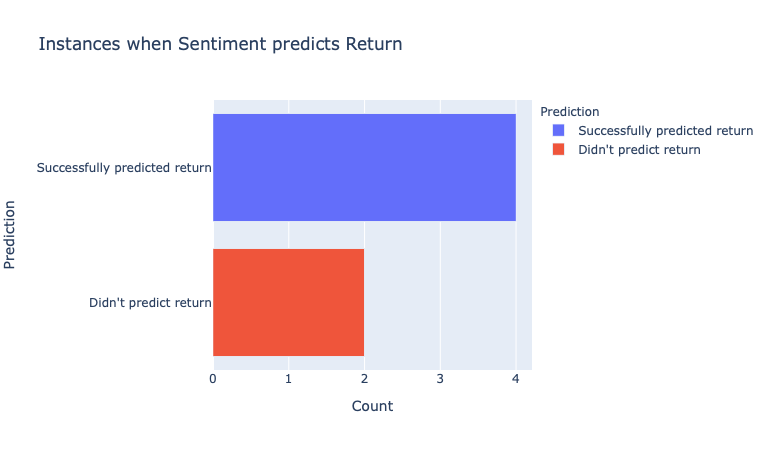

In [195]:
fig = px.bar(
    match,
    x=0,
    y=match.index,
    color=match.index,
    title="Instances when Sentiment predicts Return",
    labels={"index": "Prediction",
            "0": "Count"}
)

fig.show()

# Final Function

In [196]:
def sentimentAndPrice(ticker, start, end, numtweets=20):
    """
    Visually compares sentiment with the closing price of a given stock ticker.
    """
    # Creating a DF that contains daily tweets between two dates
    df = tweetByDay(start, end, pd.DataFrame(), search="$"+ticker, limit=numtweets)
        
    # Analyzing the sentiment of each tweet
    sent_df = getSentiment(
        df, 
        measurement='compound'
    )
    
    # Getting stock price history
    stock_df = getStockPrices(
        ticker, 
        start, 
        end
    )
    
    # Merging the two DF
    comb_df = sent_df.merge(stock_df, how='outer', sort=True)
    
    # Shifting the sentiment scores 1 day to compensate for lookahead bias
    comb_df['sentiment'] = comb_df['sentiment'].shift(1)
    
    # Scaling the returns
    scaler = MinMaxScaler(
        feature_range=(
            comb_df['sentiment'].min(),
            comb_df['sentiment'].max()
        )
    )

    comb_df[['returns']] = scaler.fit_transform(comb_df[['returns']])
        
    # How often sentiment matched return

    # Dropping NAs so they are not compared
    drop_df = comb_df.dropna()

    # Comparing matches
    match = (drop_df['sentiment'].apply(lambda x: x>0)==drop_df['returns'].apply(lambda x: x>0))

    # Counting instances where they match
    match = match.value_counts().rename({False: "Didn't predict return",
                                         True: "Successfully predicted return"}).to_frame()
    
    # Visualizing matches in sentiment and return
    fig = px.bar(
        match,
        x=0,
        y=match.index,
        color=match.index,
        title="Instances when Sentiment predicts Return",
        labels={"index": "Prediction",
                "0": "Count"}
    )

    fig.show()
    
        
    # Visualizing the sentiment and price
    fig = px.bar(
        comb_df,
        x='date',
        y=['returns', 'sentiment'],
        barmode='group',
        title=f"Returns & Sentiment over Time for {ticker}"
    )
    
    return fig.show()

## Running the Final Function with a New Stock

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
	20 Total Tweets collected as of 2021-08-20	
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
	40 Total Tweets collected as of 2021-08-21	
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
	59 Total Tweets co

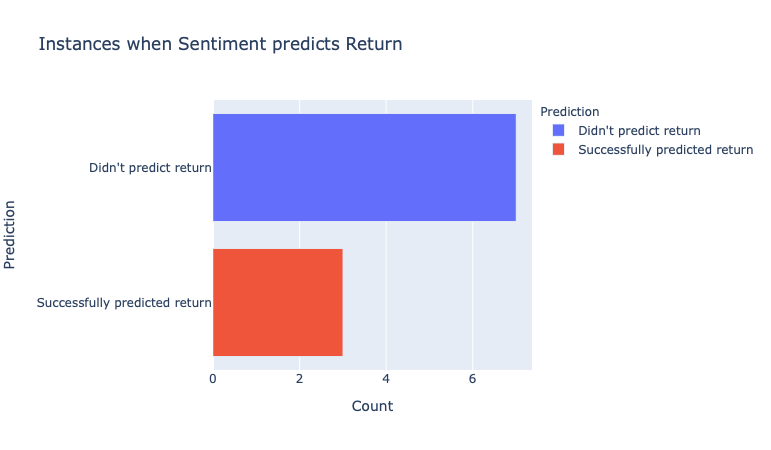

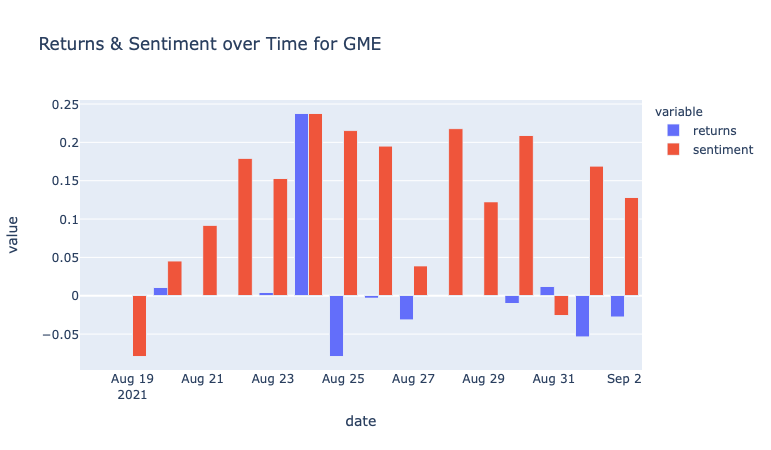

In [197]:
# Time periods
now = datetime.now()

# How far back to retrieve tweets
ago = now - timedelta(days=15)

sentimentAndPrice("GME", now.strftime("%Y-%m-%d"), ago.strftime("%Y-%m-%d"), numtweets=100)